## Advanced Sorting Algorithms: QuickSort and Merge Sort

In [2]:
## Define some function useful for testing
import random

## generate an array of n random integers up to 10000
def get_random_array(n):
    return [random.randint(0, 10000) for _ in range(n)]

def test_sorting_algorithm(algorithm):
    for _ in range(100):
        A = get_random_array(random.randint(0, 1000))
        A_sorted = algorithm(A)
        assert A_sorted == sorted(A), "FAIL!"
        
# testing testing function
test_sorting_algorithm(sorted)

## QuickSort 

Quicksort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This can be done **in-place**, requiring small additional amounts of memory to perform the sorting.

Thus, the most important part of QuickSort is its partition algorithm. 
Given a pivot element, the partition algorithm splits a subarray into three parts.

- Elements that are smaller than or equal to the pivot
- The pivot
- Elements that are greater than or equal to the pivot

The algorithm works in-place, i.e., it performs the partition within the subarray itself without any extra space.

![alt text](partition_algorithm.png "Partition: pseudocode")

![alt text](partition_figure.png "Figure")

![alt text](partition_running_example.png "Title")

### Exercise: binary vector
You are given a binary vector, i.e., each element is either 0 or 1. Implements an easy variant of partition to sort the vector.

In [1]:
import random 

binary = [random.randint(0,1) for _ in range(20)]
print(binary)

[1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0]


In [ ]:
## Your implementation goes here


### Exercise: QuickSort
Below an implementation of QuickSort. 

In this exercise you have to:
- Write detailed comments to describe crucial parts of the code below (to prove you have understand it)
- Implement a random selection of the pivot element

In [3]:
def partition(A, low, high): 
    pivot = A[high]
    i = low-1
  
    for j in range(low, high): 
        if A[j] <= pivot: 
            i = i+1 
            A[i], A[j] = A[j], A[i] 
  
    A[i+1], A[high] = A[high], A[i+1] 
    return i+1

In [4]:
def quickSort_rec(A, low, high):
    if low < high: 
        pi = partition(A, low, high) 
        quickSort_rec(A, low, pi-1) 
        quickSort_rec(A, pi+1, high) 

In [5]:
def quickSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    quickSort_rec(A, 0, len(A)-1)
    return A

In [6]:
quickSort([2, 1, 4, 3])

[1, 2, 3, 4]

In [7]:
test_sorting_algorithm(quickSort)

## Let's do some experiments

Is QuickSort faster than InsertionSort and SelectionSort in practice?

In [ ]:
T(n) = T(n-1) + c*n

Theta(n^2) worst case

T(n) = 2T(n/2) + c*n 

Theta(n log n) best case

In [8]:
def insertionSort(coll):
    A = list(coll)
    for i in range(1, len(A)):
        curr = A[i]
        j = i-1
        while j >= 0 and curr < A[j]:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = curr
    return A

In [9]:
def selectionSort(coll):
    A = list(coll)
    for i in range(len(A)): 
        # Find the minimum element in remaining unsorted array 
        min_idx = i 
        for j in range(i+1, len(A)): 
            if A[min_idx] > A[j]: 
                min_idx = j 

        # Swap the found minimum element with  
        # the first element         
        A[i], A[min_idx] = A[min_idx], A[i]
    return A

In [12]:
A = get_random_array(1000)

In [13]:
%timeit quickSort(A)

2.02 ms ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%timeit insertionSort(A)

40.4 ms ± 280 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%timeit selectionSort(A)

35.8 ms ± 246 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### More than 20x faster with arrays of length 1000. 

Try to run the experiments with an array of 10000. **Run insertion sort and selection sort just before you go to sleep.** 

### Let's see how time changes by increasing the length of the array

In [9]:
qs_t = []
is_t = []
ss_t = []

lens = [2**i for i in range(1, 11)]

for n in lens:
    A = get_random_array(n)
    result = %timeit -o quickSort(A)
    qs_t.append( result.best )
    result = %timeit -o insertionSort(A)
    is_t.append( result.best )
    result = %timeit -o selectionSort(A)
    ss_t.append( result.best )

1.21 µs ± 21.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
646 ns ± 3.04 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.32 µs ± 31.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.14 µs ± 71.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.48 µs ± 7.51 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.57 µs ± 83.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
6.33 µs ± 92.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.87 µs ± 61.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.76 µs ± 98.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.6 µs ± 223 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.7 µs ± 216 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
14.6 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
35.3 µs ± 426 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
33.4 µs ± 343 ns per loop (

In [10]:
import matplotlib.pyplot as plt # standard way to import

%matplotlib inline # any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')

UsageError: unrecognized arguments: # any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic


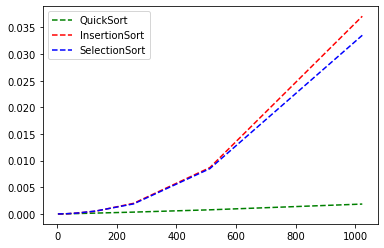

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(lens, qs_t, "g--", label="QuickSort")
ax.plot(lens, is_t, "r--", label="InsertionSort")
ax.plot(lens, ss_t, "b--", label="SelectionSort")

_ = ax.legend(loc="best")

## Merge Sort
Merge Sort is an efficient, general-purpose, comparison-based sorting algorithm. Most implementations produce a **stable sort**, which means that the order of equal elements is the same in the input and output. 

Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945.

Below a running example.

![alt text](mergesort_figure.png "Title")

### Exercise: Merge Sort
Complete the implementation of Merge Sort by implementing function ```merge()```.

In [ ]:
## Your implementation goes here

def merge(A, l, m, r): 
  ## TODO

In [18]:
def mergeSort_rec(A, l, r): 
    
    if l < r:       
        m = (l+(r-1))//2  # Same as (l+r)//2, but avoids overflow for large l and h 
    
        # Sort first and second halves 
        mergeSort_rec(A, l, m) 
        mergeSort_rec(A, m+1, r) 
        merge(A, l, m, r)

In [17]:
def mergeSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    mergeSort_rec(A, 0, len(A))
    return A

In [ ]:
test_sorting_algorithm(mergeSort)

In [ ]:
A = get_random_array(10000)

In [ ]:
%timeit quickSort(A)

In [ ]:
%timeit mergeSort(A)

In [ ]:
B B B | G G G | G G G | B B B

B B | G G G |                   G G G | B B B 